# Taller Gradiente Descendiente.

Implemente las siguientes funciones para desarrollar el algoritmo del gradiente descendente:

* `sigmoide`: funcion sigmoide como funcion de activacion.
* `prediccion`: la formula para la preduccion.
* `error`: la formula para el error en un punto.
* `peso_updt`: la funcion que actualiza lso paramentros con un paso del gradiente descendente.

El objetivo del taller es encontrar la linea optima de clasificacion de los datos.

-Despues de implementar las funciones del grandiente descendente, corra la funcion de entrenamiento. Esto hace que se grafiquen las lineas generadas en cada paso del algortimo del gradiente. Tambien se grafica la funcion error y podra observar como esta disminuye a medida que las epocas se incrementan.



In [55]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#funciones para graficar y dibujar lineas.

def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

## Leyendo y graficando los datos.

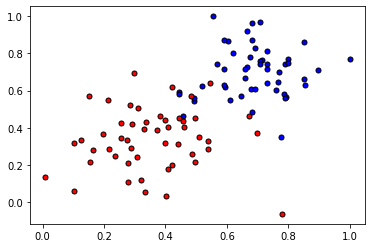

In [56]:
data = pd.read_csv('data (1).csv', header=None)
X = np.array(data[[0,1]])
y = np.array(data[2])
plot_points(X,y)
plt.show()

## Funciones basicas a implementar

Implemente las siguientes funciones.
- Funcion de activacion sigmoide

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

- Prediccion 

$$\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)$$

- Funcion error

$$Error(y, \hat{y}) = - y \log(\hat{y}) - (1-y) \log(1-\hat{y})$$

- Funcion para actualizar los pesos

$$ w_i \longrightarrow w_i + \alpha (y - \hat{y}) x_i$$

$$ b \longrightarrow b + \alpha (y - \hat{y})$$

In [57]:
# Activation (sigmoid) function
def sigmoid(x):
    return (1)/(1+np.exp(-x))

# Output (prediction) formula
def prediccion(features, weights, bias):
    return sigmoid((np.matmul(features, weights))+bias)

# Error (log-loss) formula
def error_formula(y, output):
    return -(1-y)*(np.log(1-output))-y*np.log(output)

# Gradient descent step
def update_weights(x, y, pro, weights, bias, learnrate):
    for i in range(len(x)):
        for j in range(len(weights)):
            weights[j] = weights[j] - learnrate*(pro-y)*x[j]
            bias-=learnrate*(pro-y)
    return weights,bias


## Funcion de entrenamiento
Esta funcion hace una interacion del algoritmo del gradiente descendente en todos los datos, para un numero determinado de epocas y algunas lineas limite a medida que avanza el algoritmo.

In [58]:
np.random.seed(44)

epochs = 100
learnrate = 0.02


def train(features, targets, epochs, learnrate, graph_lines=False):

    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0

    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            output = prediccion(x, weights, bias)
            error = error_formula(y, output)
            weights, bias = update_weights(x, y, output, weights, bias, learnrate)

        # Printing out the log-loss error on the training set
        out = prediccion(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e, "==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])

    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()


## Entrenamiento del algoritmo
Cuando corremos la funcion, se obtiene lo siguiente:
- 10 actualizaciones con perdidas del entrenamiento actual y precision.
- Un plot de los datos y las lineas de clasficacion que se obtienen. La final queda en negro. Entre mas epocas, las lineas se ajustan cada vez mejor =
- Un plot de la funcion error. Note que a medida que avanza las epocas, esta disminuye.


========== Epoch 0 ==========
Train loss:  0.7923019559947186
Accuracy:  0.5

========== Epoch 10 ==========
Train loss:  0.4950026931135366
Accuracy:  0.68

========== Epoch 20 ==========
Train loss:  0.36322089518425754
Accuracy:  0.85

========== Epoch 30 ==========
Train loss:  0.29931865529165225
Accuracy:  0.93

========== Epoch 40 ==========
Train loss:  0.2625093491555972
Accuracy:  0.92

========== Epoch 50 ==========
Train loss:  0.23872649888787492
Accuracy:  0.93

========== Epoch 60 ==========
Train loss:  0.2221196949538027
Accuracy:  0.93

========== Epoch 70 ==========
Train loss:  0.20986960895701692
Accuracy:  0.93

========== Epoch 80 ==========
Train loss:  0.20046017785744624
Accuracy:  0.93

========== Epoch 90 ==========
Train loss:  0.19300579709295257
Accuracy:  0.94


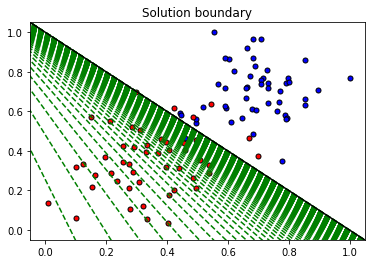

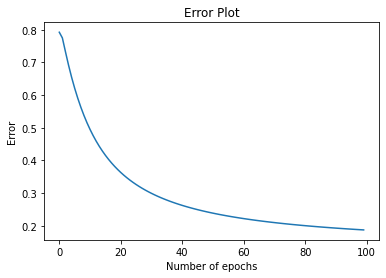

In [59]:
train(X, y, epochs, learnrate, True)
